In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

## Задание № 1*.
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
def sigmoid_check(z):
    if type(z) != int:
        zz = np.copy(z)
        for i in range(len(zz)):
            if zz[i] > 36.73680056967710427784367:
                zz[i] = 36.73680056967710427784367
            elif zz[i] < -709.782712893384:
                zz[i] = -709.782712893384
    else:
        zz = z
        if zz > 36.73680056967710427784367:
            zz = 36.73680056967710427784367
        elif zz < -709.782712893384:
            zz = -709.782712893384
    return sigmoid(zz)

In [12]:
sigmoid(70), sigmoid(-710)

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(1.0, 0.0)

In [13]:
sigmoid_check(70), sigmoid_check(-710)

(0.9999999999999998, 5.562684646268137e-309)

In [14]:
z = np.linspace(-100, 100, 1001)

In [15]:
probabilities = sigmoid(z)

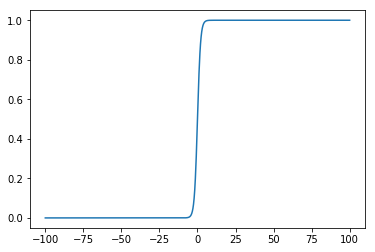

In [16]:
plt.plot(z, probabilities)
plt.show()

In [17]:
probabilities_alt = sigmoid_check(z)

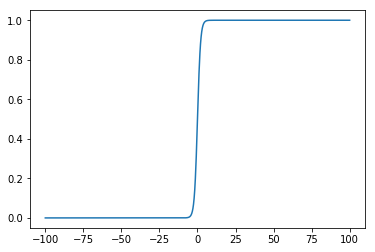

In [18]:
plt.plot(z, probabilities_alt)
plt.show()

## Задание № 2.
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [176]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid_check(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return [W, err, alpha, iterations]

In [132]:
# Генерация списков итераций и коэф. alpha
iterations_list = [100]
alpha_list = [0.1]
for i in range(9):
    iterations_list.append(iterations_list[i] * 2)
    alpha_list.append(alpha_list[i] / 5)
iterations_list = np.array(iterations_list)
alpha_list = np.array(alpha_list)
display(iterations_list)
display(alpha_list)

array([  100,   200,   400,   800,  1600,  3200,  6400, 12800, 25600,
       51200])

array([1.00e-01, 2.00e-02, 4.00e-03, 8.00e-04, 1.60e-04, 3.20e-05,
       6.40e-06, 1.28e-06, 2.56e-07, 5.12e-08])

In [145]:
w_err = []
min_err_dist = 1e-2
for alpha_ in alpha_list:
    err_dist = np.inf
    err = 100
    iterations_ = 1000
    while err_dist > min_err_dist and iterations_ <= 1024000:
        w_err.append([eval_model(X_st, y, iterations_, alpha_)])
        new_err = w_err[-1][0][1].copy()
        err_dist = err - new_err
        print(w_err[-1], err_dist)
        err = new_err
        iterations_ *= 2

[[array([-2.51890703, -0.94532648,  0.40019222,  3.1328895 ]), 0.3754024229306204], 0.1, 1000] 99.62459757706938
[[array([-4.27681634, -0.98164328, -0.27422187,  4.26220436]), 0.326665613183083], 0.1, 2000] 0.04873680974753741
[[array([-6.58552026, -1.08572008, -1.09098018,  5.89834449]), 0.28253722160829253], 0.1, 4000] 0.04412839157479048
[[array([-9.56650604, -1.29085277, -2.0555972 ,  8.19624232]), 0.24420551648738908], 0.1, 8000] 0.03833170512090345
[[array([-13.72816892,  -1.63397868,  -3.32389026,  11.53922147]), 0.20610296135011982], 0.1, 16000] 0.03810255513726926
[[array([-19.66816656,  -2.1569958 ,  -5.06917438,  16.36437001]), 0.16700098482060838], 0.1, 32000] 0.039101976529511445
[[array([-27.54549244,  -2.86744425,  -7.32451515,  22.76251685]), 0.13247616802073162], 0.1, 64000] 0.03452481679987676
[[array([-37.28977752,  -3.7435261 , -10.07588345,  30.63137072]), 0.10612802369593613], 0.1, 128000] 0.026348144324795486
[[array([-49.45264023,  -4.78149391, -13.53623313,  40

При alpha=0.1, iterations=1 024 000, показатель ошибки log-loss около 0.048, но в то же время веса при признаках большие

[-90.31036232,  -7.5296465 , -25.77098698,  71.30635718], что может свидетельствовать о переобучении модели.

## Задание № 3.
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [185]:
def calc_pred_proba(w, X):
    display(w)
    display(X)
    z = w.dot(X)
    display(z)
    y_pred_proba = sigmoid_check(z)
    return y_pred_proba

In [184]:
# calc_pred_proba(eval_model(X_st, y, iterations=1024000, alpha=0.004)[0], X_st)
calc_pred_proba(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st)

array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913])

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

array([ -0.48019284,  -2.87914041,  12.60123141, -11.23758826,
         1.81543448,  -1.68913379,  14.9063259 ,  -3.03844509,
         0.11954406,   9.60254694])

array([3.82206591e-01, 5.31944127e-02, 9.99996632e-01, 1.31695734e-05,
       8.60017399e-01, 1.55889789e-01, 9.99999664e-01, 4.57189615e-02,
       5.29850474e-01, 9.99932448e-01])

## Задание № 4.
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [193]:
def calc_pred(w, X):
#     display(w)
#     display(X)
    z = w.dot(X)
#     display(z)
    y_pred_proba = sigmoid_check(z)
    return [1 if i >=0.5 else 0 for i in y_pred_proba]

In [222]:
# calc_pred_proba(eval_model(X_st, y, iterations=1024000, alpha=0.004)[0], X_st)
y_pred = calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [197]:
np.all(y_pred == y)

True

## Задание № 5*.
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [200]:
# Accuracy
def accuracy_rate(y, y_pred):
    return sum([1 if y[i] == y_pred[i] else 0 for i in range(len(y))]) / len(y)

In [201]:
accuracy_rate(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

1.0

In [212]:
def tp_cases(y, y_pred):
    return np.sum(np.array([1 if y[i] == y_pred[i] == 1 else 0 for i in range(len(y))]))

In [213]:
tp_cases(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

5

In [214]:
def tn_cases(y, y_pred):
    return np.sum(np.array([1 if y[i] == y_pred[i] == 0 else 0 for i in range(len(y))]))

In [219]:
tn_cases(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

5

In [215]:
def fp_cases(y, y_pred):
    return np.sum(np.array([1 if y[i] != y_pred[i] and y[i] == 0 else 0 for i in range(len(y))]))

In [218]:
fp_cases(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

0

In [216]:
def fn_cases(y, y_pred):
    return np.sum(np.array([1 if y[i] != y_pred[i] and y[i] == 1 else 0 for i in range(len(y))]))

In [217]:
fn_cases(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

0

In [220]:
# Матрица ошибок
def confusion_matrix(y, y_pred):
    matrix = np.array([[tp_cases(y, y_pred), fp_cases(y, y_pred)],
                       [fn_cases(y, y_pred), tn_cases(y, y_pred)]])
    return matrix

In [221]:
confusion_matrix(y, calc_pred(np.array([-22.25780205,  -2.38948041,  -5.81621117,  18.46958913]), X_st))

array([[5, 0],
       [0, 5]])

In [ ]:
# Точность
def precision_rate(y, y_pred):
    return tp_cases(y, y_pred) / (tp_cases(y, y_pred) + fp_cases(y, y_pred))

In [ ]:
# Полнота
def recall_rate(y, y_pred):
    return tp_cases(y, y_pred) / (tp_cases(y, y_pred) + fn_cases(y, y_pred))

In [ ]:
# F1 score
def f1_score(y, y_pred):
    return 2 * tp_cases(y, y_pred) / (2 * tp_cases(y, y_pred) + fp_cases(y, y_pred) + fn_cases(y, y_pred))

## Задание № 6.
Могла ли модель переобучиться? Почему?

При значениях alpha=0.1 и iterations=1 024 000 (log-loss около 0.048) веса при признаках получились

[-90.31036232, -7.5296465 , -25.77098698, 71.30635718], что может свидетельствовать о переобучении модели

В случае наличия достаточных по объёму данных, мы могли бы разбить их на тренировочную и тестовую часть и проверить наличие переобучения на практике. Т.е. чтобы более обосновано ответить на вопрос, нужно проверить предсказание модели на новых данных.